 Simple Linear Regression which consists of two columns/features one is the CGPA and Package(in LPA) which will be (Value which is needed to be Predicted using Predictor variable).

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the DataSet

In [2]:
df=pd.read_csv("placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


## Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


### Checking missing values

In [5]:
df.isna().sum()

cgpa       0
package    0
dtype: int64

### Conclusion:
Here is no any missing value present in the data set.So we don't need any preprosesing for missing value. 

In [6]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


### Plots

<AxesSubplot:>

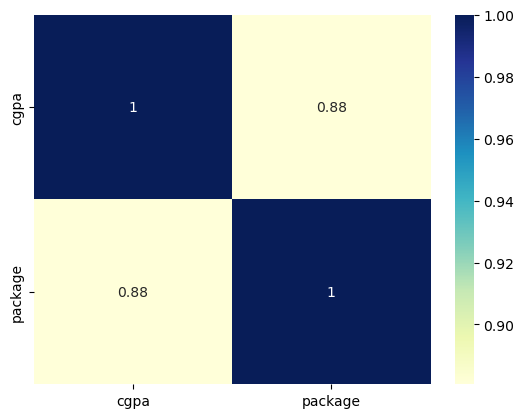

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

### Conclusion:
In CGPA and Package their are positive correlation.That's mean as CGPA increase package is also increase.

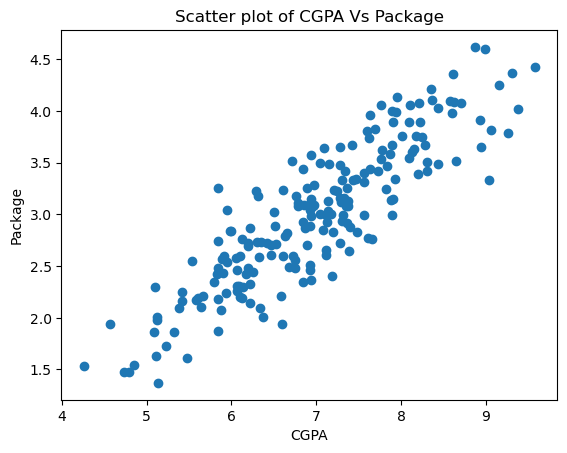

In [8]:
plt.scatter(df["cgpa"],df["package"])
plt.title("Scatter plot of CGPA Vs Package")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

### Conclusion:
From this scatter plot we can conclude that CGPA increase package is also increases.

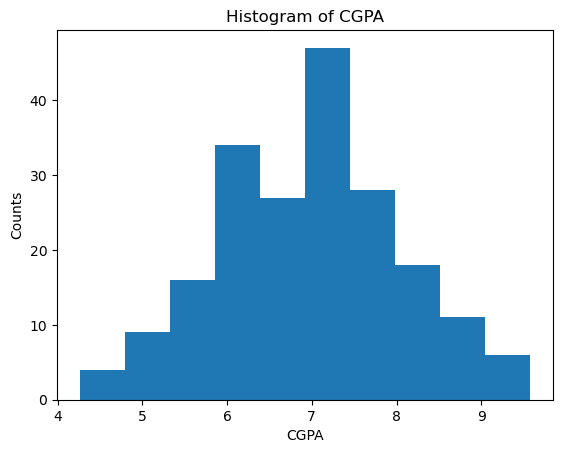

In [9]:
plt.hist(df["cgpa"])
plt.title("Histogram of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Counts")
plt.show()

### Conclusion:
Here we see that CGPA follows normal distribution.

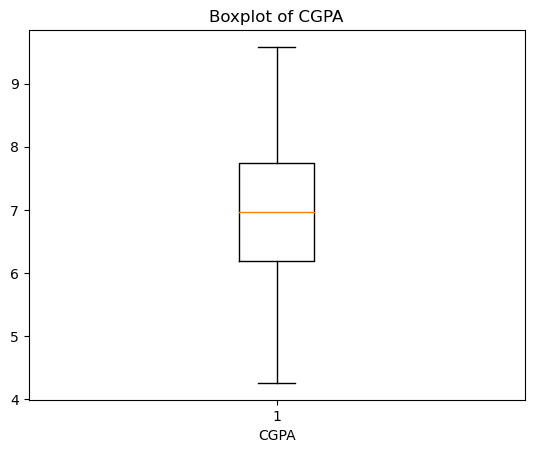

In [10]:
plt.boxplot(df["cgpa"])
plt.title("Boxplot of CGPA")
plt.xlabel("CGPA")
plt.show()

### Conclusion:
We can see that here is no outliers.

### Divide the data into features and target variable

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## Train & Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.shape,x_test.shape

((160, 1), (40, 1))

## Model Building

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Prediction

In [15]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.97 2.98]
 [2.56 2.87]
 [2.62 2.59]
 [3.4  3.83]
 [3.06 3.64]
 [2.36 2.08]
 [3.52 2.99]
 [2.47 2.46]
 [4.12 3.65]
 [3.22 3.08]
 [2.13 1.61]
 [3.19 3.16]
 [2.54 2.72]
 [3.05 2.85]
 [3.37 3.44]
 [2.86 2.48]
 [2.63 2.73]
 [2.82 2.49]
 [2.37 2.43]
 [2.92 3.44]
 [3.17 2.72]
 [2.34 2.18]
 [3.51 3.58]
 [3.99 4.08]
 [2.2  2.19]
 [1.91 2.3 ]
 [3.09 3.03]
 [2.61 3.18]
 [1.92 2.01]
 [1.9  1.86]
 [2.91 2.35]
 [3.7  3.39]
 [2.6  2.73]
 [2.09 2.25]
 [2.51 2.3 ]
 [3.64 4.06]
 [3.17 3.12]
 [2.97 3.57]
 [3.83 3.49]
 [2.5  2.19]]


## Model evaluation

### A) By Visualization:
#### Visualization of Traning set results

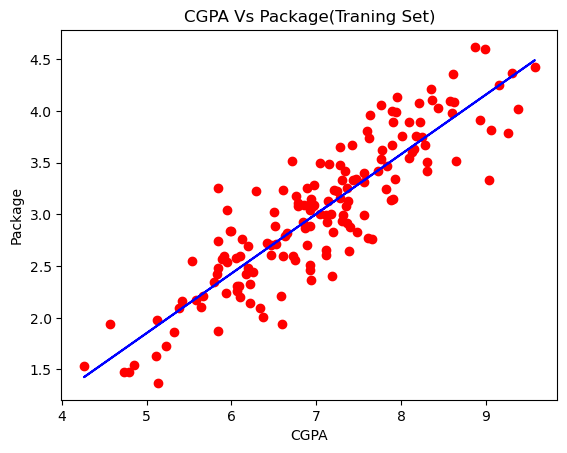

In [16]:
plt.scatter(x_train,y_train,color="r")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title("CGPA Vs Package(Traning Set)")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

#### Visualization of test set

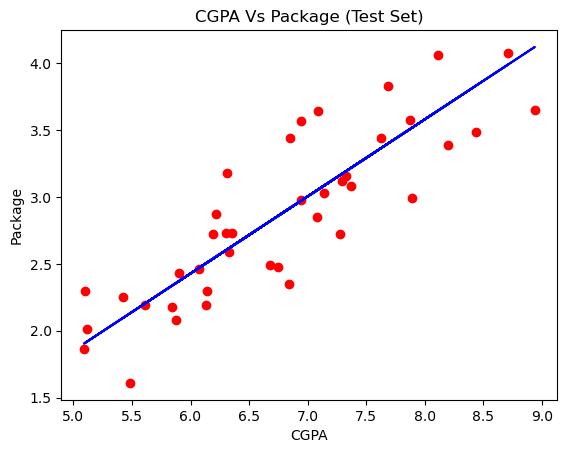

In [17]:
plt.scatter(x_test,y_test,color="r")
plt.plot(x_test,regressor.predict(x_test),color="blue")
plt.title("CGPA Vs Package (Test Set)")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show()

### Conclusion:
From the visualization we can conclude that our test set data fits good,So our model is good.

### B) By Errors

#### R_Square & mean_square_error(MSE)

In [18]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_pred,y_test)
print("The mean square error(MSE): ",MSE)

from sklearn.metrics import r2_score
R_Squ=r2_score(y_pred,y_test)
print("The R_Square value or coefficient of determination: ",R_Squ)

The mean square error(MSE):  0.10221131059334207
The R_Square value or coefficient of determination:  0.6850801172377523


### Conclusion:
The model returns  R_Square
  value of 68.50%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique.